# Salary Prediction based on job descriptions

This project explains how to predict the salaries based on job descriptions. There are features like education,degree,major
,year of experience and designation will impact the predicted salaries.We will analyze the data available and create a 
model that will predict the salary based on these features.

In [477]:
__author__ = "Deepa Syriac"
__email__  = "deepasyriac@gmail.com"

In [478]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

Load the data

In [479]:
#load the data into a Pandas dataframe
train_features = pd.read_csv('data/train_features.csv')
train_salaries = pd.read_csv('data/train_salaries.csv')
test_features = pd.read_csv('data/test_features.csv')

Clean the data

In [480]:
train_features.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [481]:
train_salaries.head()

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163


In [482]:
test_features.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44


In [483]:
#check the train_feature info
train_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [484]:
#check the train_salaries info
train_salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   jobId   1000000 non-null  object
 1   salary  1000000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 15.3+ MB


In [485]:
#check the test_salaries info
test_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [486]:
#check for duplicates in trainfeature
train_features.duplicated().sum()

0

In [487]:
#check for duplicates in trainsalaries
train_salaries.duplicated().sum()

0

In [488]:
#check for duplicates in testsalaries
test_features.duplicated().sum()

0

# Explore the data and analyze

Separate numerical and categorical features of the training data

In [489]:
train_features.columns

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis'],
      dtype='object')

In [490]:
train_features.describe(include=[np.number])

,yearsExperience,milesFromMetropolis
count,1000000.000000,1000000.000000
mean,11.992386,49.529260
std,7.212391,28.877733
min,0.000000,0.000000
25%,6.000000,25.000000
50%,12.000000,50.000000
75%,18.000000,75.000000
max,24.000000,99.000000


In [491]:
train_features.describe(include=['O'])

,jobId,companyId,jobType,degree,major,industry
count,1000000,1000000,1000000,1000000,1000000,1000000
unique,1000000,63,8,5,9,7
top,JOB1362684564022,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB
freq,1,16193,125886,236976,532355,143206


 Merge the train_features and train_salaries into train_df

In [492]:
train_df = pd.merge(train_features,train_salaries,on ='jobId',how = 'inner')

Delete the original files to save memory

In [493]:
del train_features
del train_salaries

In [494]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
 8   salary               1000000 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


In [495]:
train_df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


# Visualize the distribution of predicted variable (Salary)

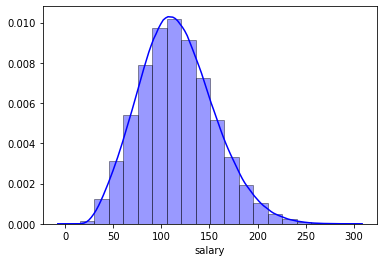

In [496]:
sns.distplot(train_df.salary , hist=True, bins= 20,color = 'blue', 
             hist_kws={'edgecolor':'black'})

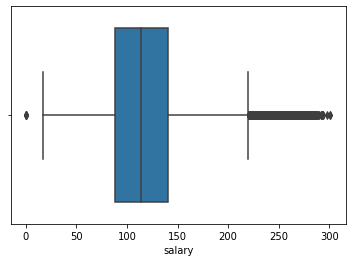

In [497]:
sns.boxplot(train_df.salary)
plt.show()

# Identify potential outliers using IQR method

In [498]:
dataset= train_df.salary.describe()
print(dataset)
IQR= dataset['75%']-dataset['25%']
upperlimit = dataset['75%'] + (1.5*IQR)
lowerlimit = dataset['25%'] - (1.5*IQR)
print("The upper outlier limit is" , upperlimit)
print("The lower outlier limit is" , lowerlimit)

count    1000000.000000
mean         116.061818
std           38.717936
min            0.000000
25%           88.000000
50%          114.000000
75%          141.000000
max          301.000000
Name: salary, dtype: float64
The upper outlier limit is 220.5
The lower outlier limit is 8.5


In [499]:
train_df.query('salary < 8.5')

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0


In [500]:
train_df = train_df[train_df.salary > 8.5]

In [501]:
train_df.query('salary > 220.5')

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
266,JOB1362684407953,COMP30,CEO,MASTERS,BIOLOGY,OIL,23,60,223
362,JOB1362684408049,COMP38,CTO,MASTERS,NONE,HEALTH,24,3,223
560,JOB1362684408247,COMP53,CEO,MASTERS,BIOLOGY,WEB,22,7,248
670,JOB1362684408357,COMP26,CEO,MASTERS,MATH,AUTO,23,9,240
719,JOB1362684408406,COMP54,VICE_PRESIDENT,DOCTORAL,BIOLOGY,OIL,21,14,225
...,...,...,...,...,...,...,...,...,...
998516,JOB1362685406203,COMP29,CFO,MASTERS,ENGINEERING,WEB,14,46,227
999249,JOB1362685406936,COMP30,CEO,NONE,NONE,OIL,17,10,223
999280,JOB1362685406967,COMP2,CFO,BACHELORS,BUSINESS,SERVICE,21,0,228
999670,JOB1362685407357,COMP20,CEO,DOCTORAL,LITERATURE,SERVICE,24,14,233


In [502]:
train_df.loc[train_df.salary > 220.5,'jobType'].value_counts()

CEO               3227
CFO               1496
CTO               1488
VICE_PRESIDENT     603
MANAGER            217
SENIOR              66
JUNIOR              20
Name: jobType, dtype: int64

In [503]:
train_df[(train_df.salary > 220.5) & (train_df.jobType == 'JUNIOR')]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
1222,JOB1362684408909,COMP40,JUNIOR,MASTERS,COMPSCI,OIL,24,5,225
27710,JOB1362684435397,COMP21,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,3,246
31355,JOB1362684439042,COMP45,JUNIOR,DOCTORAL,COMPSCI,FINANCE,24,0,225
100042,JOB1362684507729,COMP17,JUNIOR,DOCTORAL,BUSINESS,FINANCE,23,8,248
160333,JOB1362684568020,COMP18,JUNIOR,DOCTORAL,BUSINESS,FINANCE,22,3,223
189582,JOB1362684597269,COMP32,JUNIOR,DOCTORAL,BUSINESS,OIL,24,11,221
214606,JOB1362684622293,COMP47,JUNIOR,MASTERS,BUSINESS,FINANCE,22,4,222
303778,JOB1362684711465,COMP51,JUNIOR,MASTERS,ENGINEERING,WEB,24,2,226
348354,JOB1362684756041,COMP56,JUNIOR,DOCTORAL,ENGINEERING,OIL,23,25,226
427593,JOB1362684835280,COMP54,JUNIOR,DOCTORAL,ENGINEERING,FINANCE,23,3,221


In [504]:
#final cleaned dataframe
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999995 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   jobId                999995 non-null  object
 1   companyId            999995 non-null  object
 2   jobType              999995 non-null  object
 3   degree               999995 non-null  object
 4   major                999995 non-null  object
 5   industry             999995 non-null  object
 6   yearsExperience      999995 non-null  int64 
 7   milesFromMetropolis  999995 non-null  int64 
 8   salary               999995 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


In [505]:
def plot_variables(df,var): 
    '''
    produce plot for each features
    plot1(left), the distribution of samples on the feature
    plot2(right), the dependance of salary on the feature
    '''
    plt.figure(figsize = (14, 4))
    plt.subplot(1, 2, 1)
    if df[var].dtype == 'int64':
        df[var].value_counts().sort_index().plot()
    else:
        #change the object datatype of each variable to category type and order their level by the mean salary
        mean = df.groupby(var)["salary"].mean()
        df[var] = df[var].astype('category')
        level = mean.sort_values().index.tolist()
        df[var].cat.reorder_categories(level, inplace=True)
        df[var].value_counts().plot()        
    plt.xticks(rotation=45)
    plt.xlabel(var)
    plt.ylabel('Count')
    
    plt.subplot(1, 2, 2)
    if df[var].dtype == 'int64' or var == "companyId": # there are many companyId and better to see with line
        #plot the mean salary for each category and shade the line between the (mean - std, mean + std)
        mean = df.groupby(var)["salary"].mean()
        std = df.groupby(var)["salary"].std()
        mean.plot()
        plt.fill_between(range(len(std.index)), mean.values-std.values, mean.values + std.values,alpha = 0.1)
    else:
        sns.boxplot(x= var, y="salary", data= df)
    
    plt.xticks(rotation=45)
    plt.ylabel('Salary')
    plt.show()

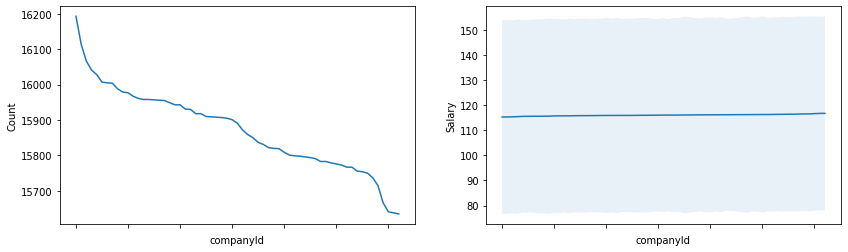

In [506]:
plot_variables(train_df,"companyId")

Salary is weakly correlated to companyId

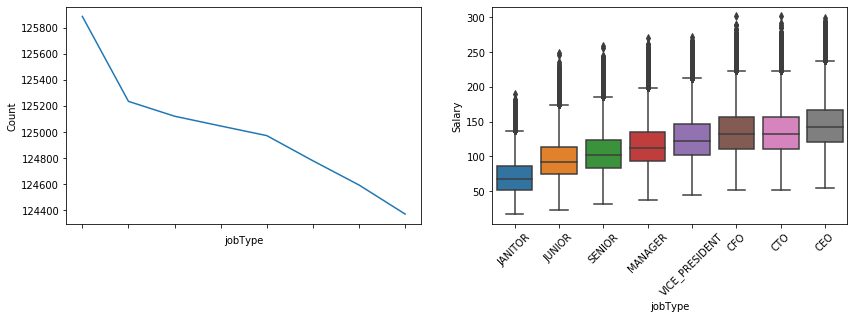

In [507]:
plot_variables(train_df,"jobType")

salary is positively correlated to jobType

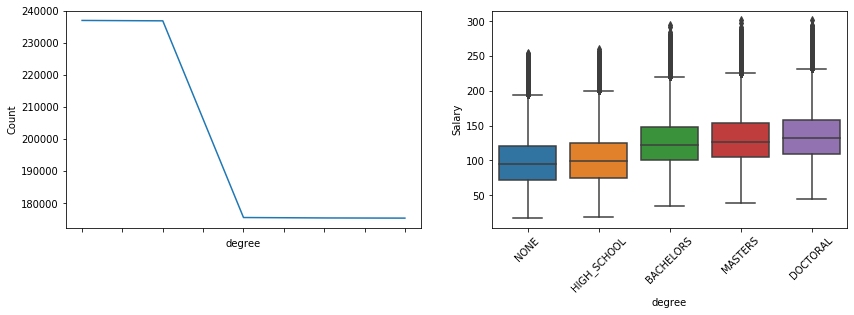

In [508]:
plot_variables(train_df,"degree")

salary is positively correlated to the degree

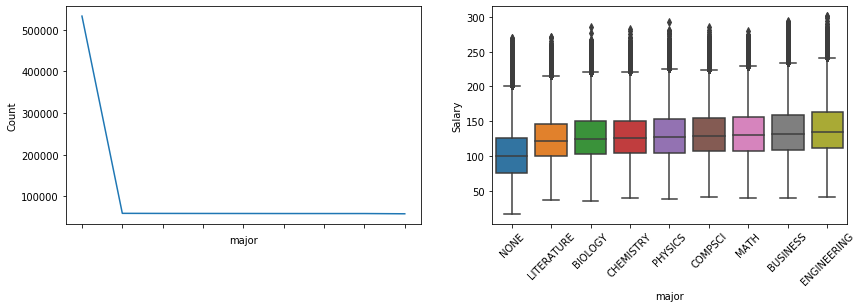

In [509]:
plot_variables(train_df,"major")

The None major have the low salary while major of Engineering,Business and Math are highly paid

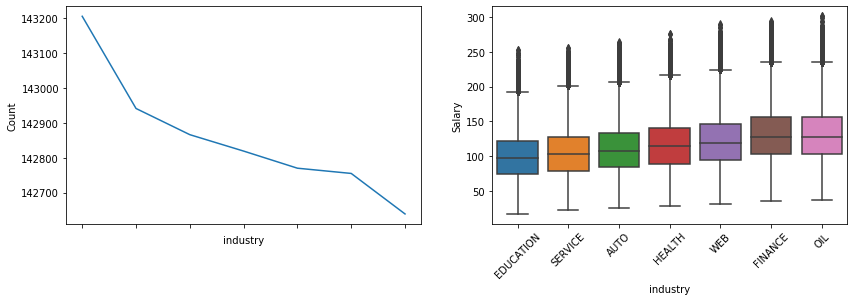

In [510]:
plot_variables(train_df,"industry")

For industry type, Oil,Finance and Web industries pay more

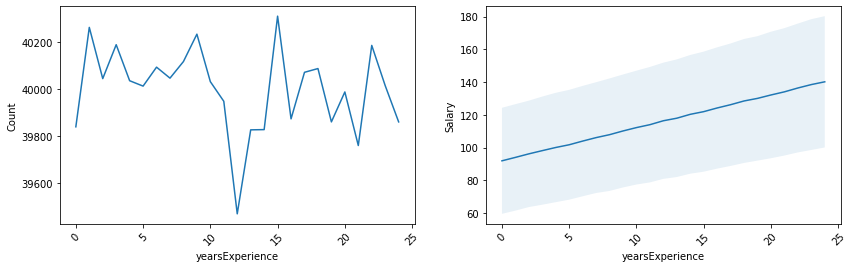

In [511]:
plot_variables(train_df,"yearsExperience")

There is a positive correlation with salary and years of experience

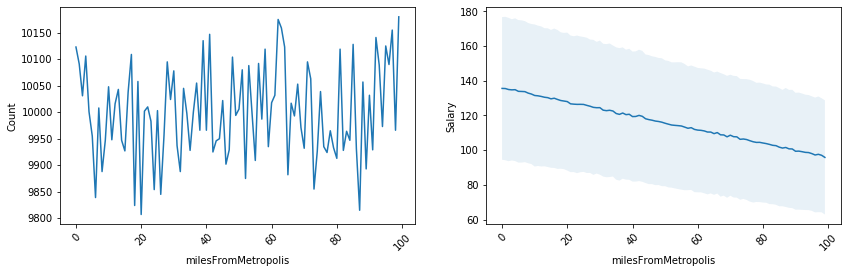

In [512]:
plot_variables(train_df,"milesFromMetropolis")

salary has a negative correlation to milesfromMetropolis, since the salary decreases with the distance to metropolis

#### To transform the catagorical variables in to numeric variables use LabelEncoder from sklearn.preprocessing

In [513]:
def Encode_Data(df):    
    for col in df.columns:        
        if df[col].dtype.name == "category" or "object":
            le = LabelEncoder()
            df[col]=le.fit_transform(df[col])
    return df

In [514]:
train_target= train_df['salary']
train_feature = train_df.drop(['jobId','salary'],1)
test_feature = test_features.drop(['jobId'],1)

In [515]:
train_feature = Encode_Data(train_feature)
test_feature = Encode_Data(test_feature)

In [516]:
train_feature.head()

,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,31,1,3,6,3,10,83
1,11,0,2,7,6,3,73
2,48,7,1,8,3,10,38
3,32,5,1,2,0,8,17
4,60,7,0,8,2,8,16


In [517]:
test_feature.head()

,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,27,5,2,7,3,22,73
1,5,4,4,7,0,20,47
2,2,2,3,0,3,17,9
3,14,5,2,7,4,14,96
4,30,4,1,0,4,10,44


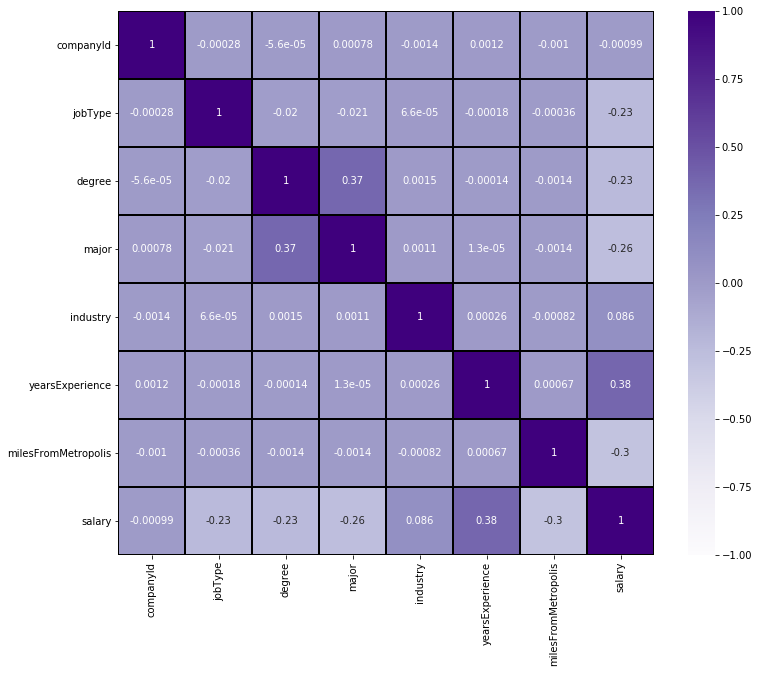

In [518]:
# Heatmap
df = train_feature.join(train_target)
plt.figure(figsize=(12,10))
corr = df.corr()
sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns,cmap="Purples",annot=True,vmin=-1, vmax=1,linewidths=1,linecolor='black')
plt.show()

# Model Evaluation and selection

In [519]:
#Convert data to arrays
train_Data = np.array(train_feature)
target = np.array(train_target)

In [520]:
#initialize model list and dicts
models = []
mean_mse = {}
cv_std = {}

#### Create Linear Regression,Random Forest Regression and Gradient Boosting regression models

In [521]:
def Model_Training(model,X_train,y_train, mean_mse, cv_std):
    print("Trained model name:",model)
    neg_mse= cross_val_score(model,X_test,y_test,cv=5,scoring='neg_mean_squared_error')
    mean_mse[model] = -1.0*np.mean(neg_mse)
    cv_std[model] = np.std(neg_mse)
    print('Average MSE:\n', mean_mse[model])
    print('Standard deviation during CV:\n', cv_std[model])

In [522]:
lr = LinearRegression()
rf = RandomForestRegressor(n_estimators=170, n_jobs=2, max_depth=30, \
                           min_samples_split=60, max_features='auto', verbose=0)
gbr = GradientBoostingRegressor(n_estimators=160, max_depth=6, loss='ls',verbose=0)
models.extend([lr, rf, gbr])

print("Beginning cross validation")
for model in models:
    X_train, X_test, y_train, y_test= train_test_split(train_Data,target,test_size=0.3,random_state=0)
    Model_Training(model, X_train, y_train, mean_mse, cv_std)     

Beginning cross validation
Trained model name: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Average MSE:
 922.9347032464839
Standard deviation during CV:
 3.9551740747312354
Trained model name: RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=30, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=60, min_weight_fraction_leaf=0.0,
                      n_estimators=170, n_jobs=2, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
Average MSE:
 388.0972501416828
Standard deviation during CV:
 2.724938336163366
Trained model name: GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=6,
                   

In [523]:
#choose model with lowest mse
model = min(mean_mse, key=mean_mse.get)
print('\nPredictions calculated using model with lowest MSE:')
print(model)
#train model on entire dataset
model.fit(X_train, y_train)


Predictions calculated using model with lowest MSE:
GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=6,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=160,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=6,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=160,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

# Deploy

In [525]:
#create predictions based on test data
predictions =pd.DataFrame(model.predict(test_feature)) 
test_jobid=pd.DataFrame(test_features['jobId'])
predictions.columns= ["salary"]
prediction_df=pd.concat([test_jobid,predictions],axis=1)

In [526]:
# JobId and Predicted salaries
prediction_df.head()

,jobId,salary
0,JOB1362685407687,110.562320
1,JOB1362685407688,94.596080
2,JOB1362685407689,184.027319
3,JOB1362685407690,103.682905
4,JOB1362685407691,116.142369


In [527]:
#saving the predictions
prediction_df.to_csv('test_salaries.csv')

In [528]:
#showing feature importances
feature_importances = pd.DataFrame({'feature':train_feature.columns, 'importance':importances})
feature_importances.sort_values(by='importance', ascending=False, inplace=True)
#set index to 'feature'
feature_importances.set_index('feature', inplace=True, drop=True)


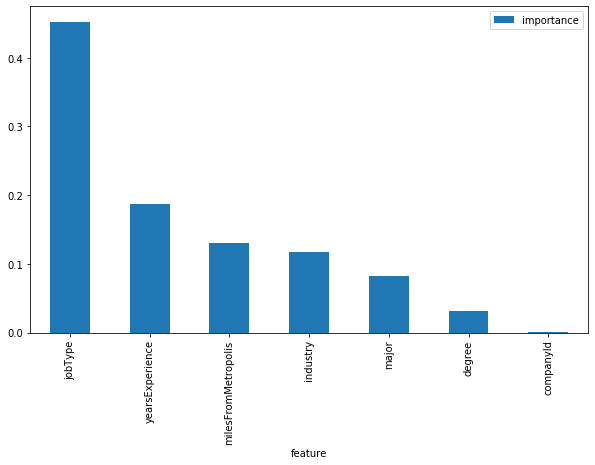

In [529]:
feature_importances[0:25].plot.bar(figsize=(10,6))
plt.show()